
# Project: Investigate a Dataset - [NoShowAppointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> After a thorough check of all the available datasets, I realized that No-show appointments would fit perfectly and go in line with the kind of analysis I tend to do. Patients are often found to miss physician appointments based on several factors which poised lots of unclear reasons to the medical community. This dataset would be a great assistant to diving deeper into some of the root causes and probably finding a lasting solution to such happenings.


### Question(s) for Analysis
**Some of the questions that ill explore using the dataset No-Show appointment iclude:

> 1. What is the comparison between the two instances of not showing up for an appointment and showing up for an appointment.Here to get a clear view i will plot a bar graph agaisnt the number of appointments?

> 2. Is there a correlation between the disease categories(Hipertension,Alcoholism,Diabetes,Handcap) and Age?

> 3. What Days of the week have the highest numbers of appointments with good Show-up responses?

> 4. Which neighborhood has the highest number of appointments with physicians?
Does the SMS reminder have a positive impact in making sure that patience sees the physicians?

>> I would adopt the Variable Identification, Variable transformation, Variable creation, Missing values treatment and Outlier treatment to clean and prepare my data for proper exploration which will help in building a clear-cut analytical report.

In [ ]:
# Importing statements for all of the packages necessary for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
pd.options.display.max_rows = 10000000
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")



# print(df.head())
df.head()
#df.info()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# displays the number of rows and columns in the data set
df.shape

(110527, 14)

In [ ]:
# computing a summary of statistics pertaining the dataframe(df_c)columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
# To confirm the number of null values in the columns from the dataset is zero
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
# checking if there are any duplicates in the datasets 
df.duplicated().sum()

# Output 0 confirms no records have been duplicated.

0

In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
 

In [ ]:
#We now understand the structure of the data and unimportant data that will be
#   cleaned. 
# Now,  let's Convert the string dateformat to datetime64 [Nanosecond]
# Also, days of the week with Monday to be 0 and Sunday to be the sixt day (6)

df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['Day_Scheduled'] = df['ScheduledDay'].dt.day
df['weekday_Scheduled'] = df['ScheduledDay'].dt.dayofweek
df['Month_Scheduled'] = df['ScheduledDay'].dt.month


df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['Day_appointed'] = df['AppointmentDay'].dt.day
df['weekday_appointed'] = df['AppointmentDay'].dt.dayofweek
df['Month_appointed'] = df['AppointmentDay'].dt.month

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,4,29,4,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,4,29,4,4


In [ ]:
# # checking for outliers
# plt.boxplot(df_sorted['Age']);
# # This indicates there is an outlier in the dataset

In [ ]:
#Let's check the columns to see our changes 
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [ ]:
#We've identify columns with incorrect spelling and we have to rename those columns 
df.rename(columns = {'Handcap':'Handicap', 'Hipertension':'Hypertension',  'No-show':'NoShow'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,4,29,4,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,4,29,4,4


In [ ]:

# Check how many records with age < 0 and age > 100
df.query('Age < 0  | Age > 100').count()

PatientId            8
AppointmentID        8
Gender               8
ScheduledDay         8
AppointmentDay       8
Age                  8
Neighbourhood        8
Scholarship          8
Hypertension         8
Diabetes             8
Alcoholism           8
Handicap             8
SMS_received         8
NoShow               8
Day_Scheduled        8
weekday_Scheduled    8
Month_Scheduled      8
Day_appointed        8
weekday_appointed    8
Month_appointed      8
dtype: int64

The above results shows that 8 Records have Age < 0 and Age > 100, these are factored to be outliers and will be removed.

In [ ]:
#Removing Age < 0 and Age > 100
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace = True)

In [ ]:
#Cross-cheking if they've been removed.
df.query('Age < 0  | Age > 100').count()

PatientId            0
AppointmentID        0
Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
NoShow               0
Day_Scheduled        0
weekday_Scheduled    0
Month_Scheduled      0
Day_appointed        0
weekday_appointed    0
Month_appointed      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
PatientId            110519 non-null float64
AppointmentID        110519 non-null int64
Gender               110519 non-null object
ScheduledDay         110519 non-null datetime64[ns]
AppointmentDay       110519 non-null datetime64[ns]
Age                  110519 non-null int64
Neighbourhood        110519 non-null object
Scholarship          110519 non-null int64
Hypertension         110519 non-null int64
Diabetes             110519 non-null int64
Alcoholism           110519 non-null int64
Handicap             110519 non-null int64
SMS_received         110519 non-null int64
NoShow               110519 non-null object
Day_Scheduled        110519 non-null int64
weekday_Scheduled    110519 non-null int64
Month_Scheduled      110519 non-null int64
Day_appointed        110519 non-null int64
weekday_appointed    110519 non-null int64
Month_appointed      110519 non-null int64
dtypes

In [ ]:
#Counting Uniuqe patient in the dataset using the PatientId
df.PatientId.nunique()

62294

### Perfoming Univariate Analysis

>This will be focused on our target variable i.e., NoShow. checking its bar plot, frequency table, percentage distribution.

In [ ]:
# set Normalise to true to give us proportions.
df['NoShow'].value_counts(normalize=True)

No     0.79808
Yes    0.20192
Name: NoShow, dtype: float64

*The result proved that we can proceed as their is no inbalace issues

In [ ]:
def label_data(x, y, title = None):
    """
    x (str): 'The string for xlabel'
    y (str): 'The string for ylabel'
    t (str): 'The main title'
    
    return
    None
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show()

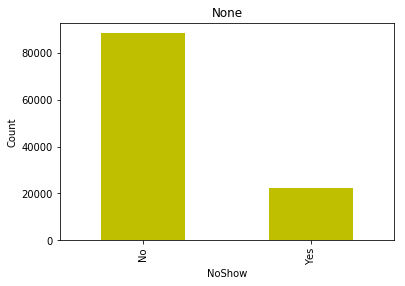

In [ ]:
df['NoShow'].value_counts().plot.bar(figsize = (6,4), title = 'NoShow - Split for given dataset', color = 'y')
label_data('NoShow', 'Count');

In the above result, the patients who do not show up on scheduled time are of 22,312 (around 20%) and who show up are 88,168 (around 80%) out of total 110,480.



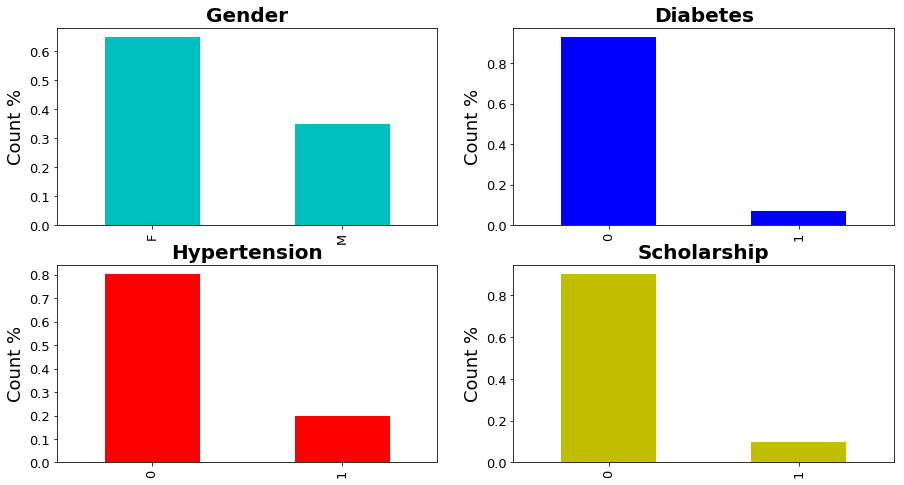

In [ ]:
#Categorical and ordinal features visualisation
plt.figure(1)
plt.figure(figsize = (13,9))
iter_cols = ['Gender', 'Diabetes', 'Hypertension', 'Scholarship']
colour = ['c', 'b', 'r', 'y']
i = 0
for col in iter_cols:    
    plt.subplot(int(str(22)+str((iter_cols.index(col)+1))))
    df[col].value_counts(normalize=True).plot.bar(figsize=(15,8), fontsize = 13.0, color = colour[i])
    plt.title(col, fontweight="bold", fontsize = 20.0)
    plt.ylabel('Count %', fontsize = 18.0)
    i = i +1  

The above bar plots shows that:

*65% patient instances are with female records <br>
*88% of patient instacnes do not have diabetes <br>
*20% of patient instances have Hypertension. <br>
*Around 85% of the these instances are not having scholarship.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What Days of the week has the highest numbers of appointments with good Show response)

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

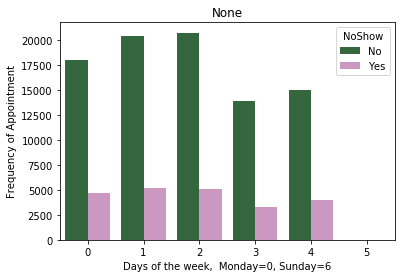

In [ ]:
app_weekday = sns.countplot(x = 'weekday_appointed', hue = 'NoShow', data = df, palette = "cubehelix")
app_weekday.set_title('No of Appointments')
label_data('Days of the week,  Monday=0, Sunday=6', 'Frequency of Appointment')

##### The report of the analysis above shows that appointments and visitation happens more during weekdays; Monday to Wednesday to be specific, while there has been a low or no turnup of pateients during weekends (Saturday and Sunday)

### Research Question 2  (Which neighbourhood has the highest number of appointments with physicians)

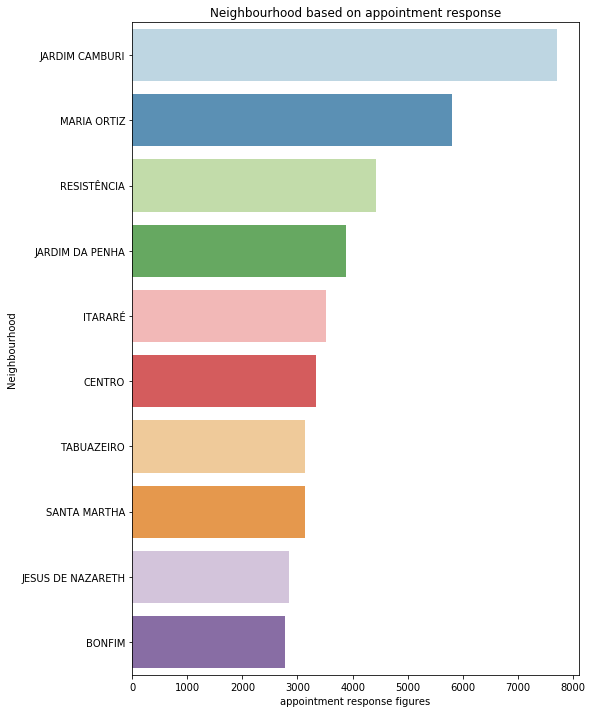

In [ ]:
#We would pick top 10 Neighbourhood based on appointment response
cnt_srs = df['Neighbourhood'].value_counts().head(10)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8, palette = "Paired")
label_data('appointment response figures', 
           'Neighbourhood', 
           "Neighbourhood based on appointment response")
# plt.xlabel('appointment response figures', fontsize=12)
# plt.ylabel('Neighbourhood', fontsize=13)
# plt.title("Neighbourhood based on appointment response", fontsize=15)
# plt.show()

Above report shows that people from The Neighbourhood of **Jardim Camburi** have the highest number of appointments with physicians

### Research Question 3 (Does the SMS reminder positively impact the patient by ensuring they see the physicians?)

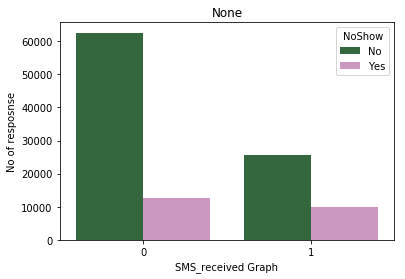

In [ ]:
#We would use SMS_received to analyze this
SMS_recieved = sns.countplot(x = 'SMS_received', hue = 'NoShow', palette = "cubehelix", data = df)
SMS_recieved.set_title('Graph of SMS_received')
label_data('SMS_received Graph', 'No of resposnse')

Above reports show that more than 60,0000 patients show up after receiving SMS reminders, which is a good indicator that patients show up for appointments when they receive a reminder

<a id='conclusions'></a>
## Conclusions

> 1. The report of the analysis shows that appointments and visitation happen more during weekdays (Monday to Wednesday to be specific), while there has been a low or no turnup of patients during weekends (Saturday and Sunday), This is a good indication that patient prefers weekdays appointment

> 2. Majority of the patient is from Jardim Camburi Neighbourhood. This could be as a result of poor hygiene in that area or hospital proximity.

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> 3. Since there is a high rate of response from patients that gets SMS reminders, it will be of great benefit and amount to a high response rate if the hospital can further increase the rate at which SMS are being sent to patient.

## Limitations 

> The limitation pointed to the SMS_Rceievd. Unfortunately, we couldn't ascertain the actual amount or SMS that each patient received that led to them showing up for an appointment. SMS sent figures is not provided in the dataset.
If there are actual numbers of SMS and time sent especially to patients that show up for appointments, it should be applied to other patients and hopefully, they will also show up for an appointment

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0